# EDA Tutorial - Indian Restaurants 

## Introduction

Exploratory Data Analysis (EDA) is a preliminary step of Machine Learning and is used extensively in this field. Although it is not necessary to perform EDA to build models, but it is definitely recommended as it helps to know the data better. If performed correctly, it gives us insights which are not easy to witness directly. 

In this notebook, I have performed a detailed analysis on Indian Restaurants Dataset from Zomato(<a href="https://www.kaggle.com/rabhar/zomato-restaurants-in-india">link</a>). This notebook can be used as a manual to perform basic to intermediate EDA on any dataset. Following are the things that you will learn from this project :-
1. Knowing basic composition of data
2. Removing duplicates
3. Dealing with missing values
4. Understanding features
5. Plotting horizontal bar charts (multicolor)
6. Using groupby, apply, and unique functions 
7. Scatter plot
8. Word Cloud
9. Box plot
10. Density plot
11. Bar Charts
12. Drawing insights and conclusions from data

Don't forget to upvote if you find this useful! :)

So without further ado, let's get started!

## Project outline

- Importing 
- Preprocessing
- - Exploring data
- - Removing duplicates
- - Dealing with missing values
- - Omitting not useful features
- EDA
- - Restaurant Chains
- - - Chains vs Outlets
- - - Top Restaurant Chains (by number of outlets)
- - - Top Restaurant Chains (by average ratings)
- - Establishment Types
- - - Number of Restaurants 
- - - Average Rating, Votes, and Photo count
- - Cities
- - - Number of Restaurants 
- - - Average Rating, Votes, and Photo count
- - Cuisine
- - - Total number of unique cuisines
- - - Number of Restaurants
- - - Highest rated cuisines
- - Highlights 
- - - Number of Restaurants
- - - Highest rated features
- - - Highlights wordcloud
- - Rating and cost
- - - Rating Distribution
- - - Average Cost for two distribution
- - - Price range count
- - - Relation between Average price for two and Rating
- - - Relation between Price Range and Rating
- - - Relation between Votes and Rating
- Conclusions

## Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
from wordcloud import WordCloud

## Preprocessing
### Exploring data

In [3]:
data = pd.read_csv("./zomato_restaurants_in_India.csv")

In [4]:
data.head(3)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1


In [5]:
data.shape

(211944, 26)

Our dataset has 26 features and 0.2 million plus rows. Let's find out more about these features using the <b>info( )</b> function

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

We have many interesting features which can be great for analysis and also some which we will omit. The difference in count of some features gives us hint of some missing values. 
While <b>info( )</b> is used to know about count, null and type properties, <b>describe( )</b> gives us statistical information about numerical data.

In [7]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


### Removing duplicates
Its important to remove duplicate rows to avoid biasness in our analysis. Since res_id is unique identifier of our restaurants, we can use it to remove duplicates.

In [8]:
data.drop_duplicates(["res_id"],keep='first',inplace=True)
data.shape

(55568, 26)

Oops! Looks like almost 75% of our data had duplicate rows. Its good that we got that out before getting started. Even though we are left with 1/4th of our original dataset, about 55000+ restaurants is still good enough to perform analysis.
### Dealing with missing values
Now let's see how many variables have missing values.

In [9]:
data.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

We have 5 variables with some kind of missing values. 
Since zipcode has ~80% missing data, its better to not consider it at all. The other 4 features can be delt with some kind of imputation, but before going through the trouble, its better to look and decide whether they would be beneficial for our analysis or we can simply omit them.
### Omitting not useful features
Here we will look at each feature and decide to consider them for our analysis or not:- 
1. <b>res_id</b> - Unique ID for each restaurant
2. <b>name</b> - Name is useful since we will use it to find top restaurants
3. <b>establishment</b> - Let's see what type of values we have in establishment

In [10]:
data["establishment"].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [11]:
print(data["establishment"].unique()[0])
print(type(data["establishment"].unique()[0]))

['Quick Bites']
<class 'str'>


Establishment looks like a nice feature to perform EDA, however each value has an unwanted square brackets and quotes which seems noisy. Let's remove them with <b>apply( )</b> function.
Also, we have one value which is an empty string, let's rename it to "NA" to avoid confusion.

In [12]:
# Removing [' '] from each value
print(data["establishment"].unique()[0])
data["establishment"] = data["establishment"].apply(lambda x:x[2:-2])
print(data["establishment"].unique()[0])

# Changing ''  to 'NA'
print(data["establishment"].unique())
data["establishment"] = data["establishment"].apply(lambda x : np.where(x=="", "NA", x))
print(data["establishment"].unique())

['Quick Bites']
Quick Bites
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' 'NA' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


4. <b>url</b> - URL is the link to restaurant's page which is not useful for us
5. <b>address</b> - Not useful since it has long strings and its difficult to classify
6. <b>city</b> - Let's check unique cities

In [13]:
data["city"].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

Look's good. 
7. <b>city_id</b> - We can uniquely use city name or id. So one feature is enough
8. <b>locality</b> - Let's see number of unique values

In [14]:
data["locality"].nunique()

3731

Although it can be an interesting feature, but since this feature has so many unique classes, we will avoid it.
9. <b>latitude</b> - Can be helpful while using geographic maps, but we won't be doing that here
10. <b>longitude</b> - Same as above
11. <b>zipcode</b> - Approx 80% missing values
12. <b>country_id</b> - Since this dataset is for Indian restaurants, there should be just one unique id here. Let's check.

In [15]:
data["country_id"].unique()

array([1])

13. <b>locality_verbose</b> - Same as locality 

In [16]:
data["locality_verbose"].nunique()

3910

14. <b>cuisines</b> - This feature has some missing values. Even though this has 9382 unique classes, we can see that each restaurant has a list of cusinies and the composition of the list is the reason why we have so many different cuisine classes. Let's check actual number of unique cuisine classes. But first we need to replace null values with a label.

In [17]:
print(data["cuisines"].nunique())
print(data["cuisines"].unique())

9382
['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']


In [18]:
data["cuisines"] = data["cuisines"].fillna("No cuisine")

In [19]:
cuisines = []
data["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


15. <b>timings</b> - This also has missing data, however it has 7740 unique classes. Also, it is not structured even if we try to reduce the number classes like we did in cuisines. Its better to omit it altogether.

In [20]:
print(data["timings"].nunique())
print(data["timings"].unique())

7740
['8:30am – 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' ... '8am – 2:30pm, 5pm – 10pm (Mon-Sun)'
 '8am – 3pm, 6:30pm – 11pm (Mon-Sun)'
 '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)']


16. <b>average_cost_for_two</b> - This is an interesting feature for our analysis, although the value "0" is strange and should be an outlier

In [21]:
data["average_cost_for_two"].unique()

array([  700,   600,   300,  1000,   400,   500,  1200,  1600,   250,
         200,   150,  1500,   800,   450,   850,   350,   900,  6000,
         650,   550,  2500,  6500,  5500,  4300,  3600,  3500,  3200,
        3000,  2800,  2000,  1800,  1400,  1300,  1250,  1150,  1100,
        1050,    50,    60,   100,   750,     0,   220,   260,   950,
        1900,  2400,  2300,  2200,  1700,  1230,    70,   140,   120,
         470,    20,    40,   110,    80,    90,   440,  2100, 14000,
        5000,  4500,  4100,  4000,  3700,  3400,  2700,  2600,  1650,
        1350,   180,  1260,     2,   197,   312,   170,   240,   330,
        3100,  4200,  1850,  3300,  4800,  3800,  3250,  2900,  1750,
         282,    35,   149,  1550,  5100,  6600,  1450,   160,  2250,
        8000,  7000,  3900,  3650,  1020,   320,   360,   280,   130,
       15000,  2501,    30,  1950,  1875,  1190,   309, 12000,   380,
         299,    45,   190,  4600,   880,    75,   620,   999, 10000,
         505, 30000,

17. <b>price_range</b> - Average prices automatically characterized into bins

In [22]:
data["price_range"].unique()

array([2, 1, 3, 4])

18. <b>currency</b> - Only one class. Not useful

In [23]:
data["currency"].unique()

array(['Rs.'], dtype=object)

19. <b>highlights</b> - They represent certain features that the restaurant specializes in and wants to highlight to their customers. Each restaurant has a list of highlights which makes the composition different for each one. We can, filter this and find total unique highlights from all restaurants.

In [24]:
print(data["highlights"].nunique())
print(data["highlights"].unique())

31228
["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"
 "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']"
 "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']"
 ...
 "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"]


In [25]:
hl = []
data["highlights"].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("Total number of unique highlights = ", hl.nunique())

Total number of unique highlights =  104


20. <b>aggregate_rating</b> - Rating given to the restaurant
21. <b>rating_text</b> - Characterisation of numeric rating into bins by using labels. We will be using direct ratings in our analysis, so we can ignore this.
22. <b>votes</b> - Number of votes contributing to the rating
23. <b>photo_count</b> - Photo uploads in reviews

Let's check the mean and range of above features

In [26]:
data[["aggregate_rating","votes","photo_count"]].describe().loc[["mean","min","max"]]

,aggregate_rating,votes,photo_count
mean,2.958593,223.330352,160.97477
min,0.000000,-18.000000,0.00000
max,4.900000,42539.000000,17702.00000


Rating ranges between 0 and 5 while 42539 are the maximum votes given to a restaurant. The negative value in votes might be an outlier.
24. <b>opentable_support</b> - Not useful since no restaurant has True value for this
25. <b>delivery</b> - This feature has 3 classes but there is no explanation for those classes. We can consider -1 and 0 to be one class or ignore this feature for now
26. <b>takeaway</b> - Again not useful since it only has one class

In [27]:
data["opentable_support"].unique()

array([ 0., nan])

In [28]:
data["delivery"].unique()

array([-1,  1,  0])

In [29]:
data["takeaway"].unique()

array([-1])

Now that we have taken a deep look at our data, let's start with some EDA!

## Exploratory Data Analysis (EDA)
### Restaurant chains
Here chains represent restaurants with more than one outlet
#### Chains vs Outlets

In [30]:
outlets = data["name"].value_counts()

In [31]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [32]:
print("Total Restaurants = ", data.shape[0])
print("Total Restaurants that are part of some chain = ", data.shape[0] - single.shape[0])
print("Percentage of Restaurants that are part of a chain = ", np.round((data.shape[0] - single.shape[0]) / data.shape[0],2)*100, "%")

Total Restaurants =  55568
Total Restaurants that are part of some chain =  19358
Percentage of Restaurants that are part of a chain =  35.0 %


<b>35%</b> of total restaurants are part of some kind of restaurant chain. Here, we should account for cases where two different retaurants might have exact same name but are not related to each other.
#### Top restaurant chains (by number of outlets)
Let's plot a horizontal bar graph to look at Top 10 restaurant chains. For the color scheme, we are using a list of pre-defined and selected colours to make the chart more appealing. If you want your analysis to look good visually, you should customize each and every element of your graph.

In [33]:
top10_chains = data["name"].value_counts()[:10].sort_values(ascending=True)

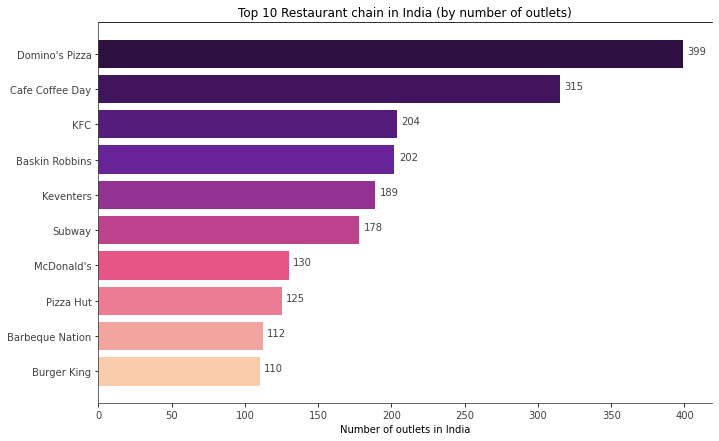

In [34]:
height = top10_chains.values
bars = top10_chains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)
 
plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by number of outlets)")


plt.show()

This chart is majorly dominaed by big fast food chains
#### Top restaurant chains (by average rating)
Here we will look at top chains by their ratings. I have set the criteria of number of outlets to greater than 4 to remove some outliers.

In [35]:
outlets = data["name"].value_counts()

In [36]:
atleast_5_outlets = outlets[outlets > 4]

In [37]:
top10_chains2 = data[data["name"].isin(atleast_5_outlets.index)].groupby("name").mean()["aggregate_rating"].sort_values(ascending=False)[:10].sort_values(ascending=True)

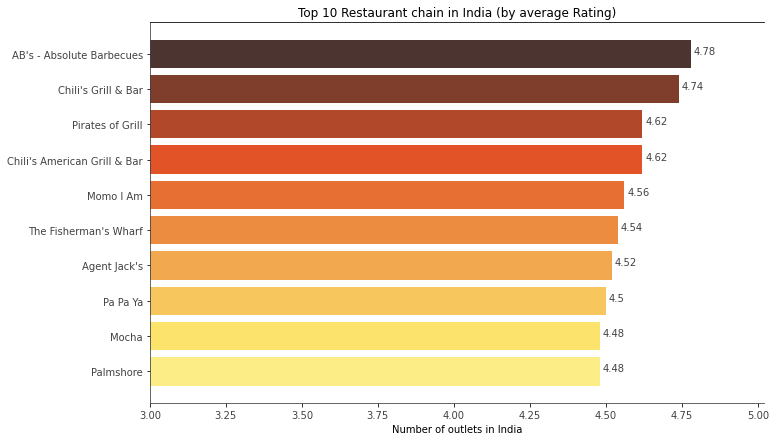

In [38]:
height = pd.Series(top10_chains2.values).map(lambda x : np.round(x, 2))
bars = top10_chains2.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#fded86', '#fce36b', '#f7c65d', '#f1a84f', '#ec8c41', '#e76f34', '#e25328', '#b04829', '#7e3e2b', '#4c3430']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v + 0.01, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by average Rating)")


plt.show()

Interestingly, no fast food chain appears in this chart. To maintain a high rating, restaurants needs to provide superior service which becomes impossible with booming fast food restaurant in every street.

### Establishment Types
#### Number of restaurants (by establishment type)

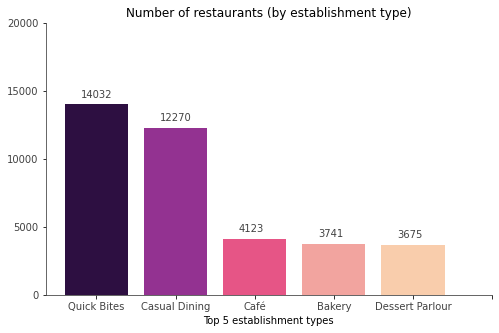

In [39]:
est_count = data.groupby("establishment").count()["res_id"].sort_values(ascending=False)[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#e65586","#f2a49f","#f9cdac"]
plt.bar(est_count.index, est_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 25000, 5000), color="#424242")
plt.xlabel("Top 5 establishment types")

for i, v in enumerate(est_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by establishment type)")


plt.show()

Top 3 represents more casual and quick service restaurants, then from 4-6 we have dessert based shops.
#### Average rating, votes and photos (by Establishment)
Here, we will not plot each graph since it will make this notebook filled with horizontal bar charts. I see horizontal bar charts the only option to display results of this kind when we have lots of classes to compare (here 10 classes). Let's look at <b>value_counts( )</b> directly

In [40]:
rating_by_est = data.groupby("establishment").mean()["aggregate_rating"].sort_values(ascending=False)[:10]
rating_by_est

establishment
Microbrewery     4.268182
Pub              3.758263
Cocktail Bar     3.531250
Fine Dining      3.436547
Lounge           3.436463
Club             3.378571
Irani Cafe       3.321429
Casual Dining    3.238680
Café             3.212345
Butcher Shop     3.110390
Name: aggregate_rating, dtype: float64

In [41]:
# To check the number of outlets in each of the above establishment type, uncomment to following code

#est_count = data.groupby("establishment").count()["name"].sort_values(ascending=False)
#rating_by_est_map = est_count.index.isin(rating_by_est.index)
#est_count = est_count[rating_by_est_map][rating_by_est.index]
#est_count

In [42]:
data.groupby("establishment").mean()["votes"].sort_values(ascending=False)[:10]

establishment
Microbrewery     1992.300000
Pub               880.274510
Bar               500.613295
Lounge            494.509756
Casual Dining     396.339935
Cocktail Bar      309.625000
Club              300.544643
Fine Dining       293.126384
Café              276.558574
Irani Cafe        178.714286
Name: votes, dtype: float64

In [43]:
data.groupby("establishment").mean()["photo_count"].sort_values(ascending=False)[:10]

establishment
Microbrewery     2042.054545
Pub               652.955182
Cocktail Bar      555.625000
Lounge            514.687805
Bar               513.321658
Fine Dining       364.817590
Café              331.935969
Casual Dining     291.550448
Irani Cafe        173.000000
Club              107.089286
Name: photo_count, dtype: float64

It can be concluded that establishments with alcohol availability have highest average ratings, votes and photo uploads.

### Cities
#### Number of restaurants (by city)

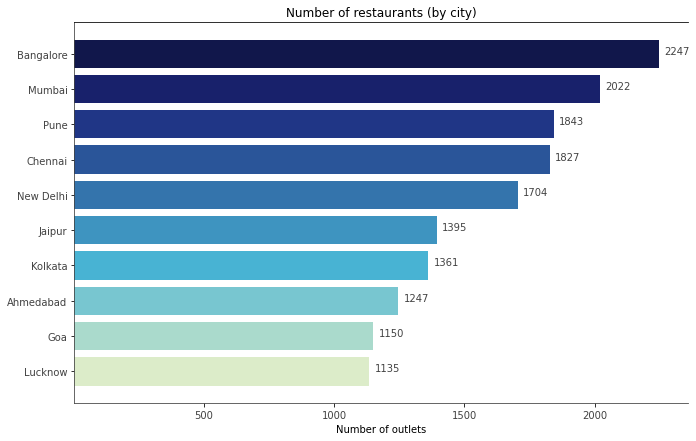

In [44]:
city_counts = data.groupby("city").count()["res_id"].sort_values(ascending=True)[-10:]

height = pd.Series(city_counts.values)
bars = city_counts.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets")

for i, v in enumerate(height):
    ax.text(v + 20, i, str(v), color='#424242')
plt.title("Number of restaurants (by city)")


plt.show()

As expected, metro cities have more number of restaurants than others with South India dominating the Top 4

#### Average rating, votes and photos (by city)

In [45]:
rating_by_city = data.groupby("city").mean()["aggregate_rating"].sort_values(ascending=False)[:10]
rating_by_city

city
Gurgaon         3.828525
Secunderabad    3.822222
Hyderabad       3.755839
Kolkata         3.751947
New Delhi       3.727347
Mumbai          3.709298
Bangalore       3.698175
Noida           3.620307
Chennai         3.597701
Pune            3.509224
Name: aggregate_rating, dtype: float64

In [46]:
# To check the number of outlets in each of the above establishment type

#city_count = data.groupby("city").count()["name"].sort_values(ascending=False)
#rating_by_city_map = city_count.index.isin(rating_by_city.index)
#city_count = city_count[rating_by_city_map][rating_by_city.index]
#city_count

In [47]:
data.groupby("city").mean()["votes"].sort_values(ascending=False)[:10]

city
Hyderabad       955.549878
Secunderabad    955.433333
Mumbai          797.158259
Bangalore       724.940365
New Delhi       711.116197
Kolkata         615.706833
Gurgaon         613.180328
Noida           515.570881
Pune            475.715681
Navi Mumbai     443.342995
Name: votes, dtype: float64

In [48]:
data.groupby("city").mean()["photo_count"].sort_values(ascending=False)[:10]

city
Mumbai         882.273492
New Delhi      764.258216
Gurgaon        678.491803
Kolkata        667.558413
Navi Mumbai    547.323671
Thane          514.963855
Noida          492.291188
Bangalore      462.287939
Hyderabad      377.274939
Pune           333.320130
Name: photo_count, dtype: float64

Gurgaon has highest rated restaurants whereas Hyderabad has more number of critics. Mumbai and New Delhi dominates for most photo uploads per outlet.

### Cuisine
#### Unique cuisines

In [49]:
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


#### Number of restaurants (by cuisine)

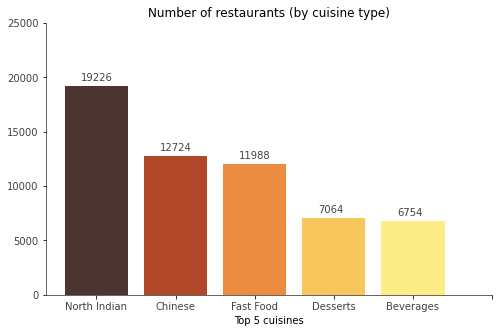

In [50]:
c_count = cuisines.value_counts()[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#4c3430', '#b04829', '#ec8c41', '#f7c65d','#fded86']
plt.bar(c_count.index, c_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 30000, 5000), color="#424242")
plt.xlabel("Top 5 cuisines")

for i, v in enumerate(c_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by cuisine type)")


plt.show()

Surprisingly, Chinese food comes second in the list of cuisines that Indians prefer, even more than fast food, desserts and South Indian food.
#### Highest rated cuisines

In [51]:
data["cuisines2"] = data['cuisines'].apply(lambda x : x.split(", "))

cuisines_list = cuisines.unique().tolist()
zeros = np.zeros(shape=(len(cuisines_list),2))
c_and_r = pd.DataFrame(zeros, index=cuisines_list, columns=["Sum","Total"])

In [52]:
for i, x in data.iterrows():
    for j in x["cuisines2"]:
        c_and_r.loc[j]["Sum"] += x["aggregate_rating"]  
        c_and_r.loc[j]["Total"] += 1

In [53]:
c_and_r["Mean"] = c_and_r["Sum"] / c_and_r["Total"]
c_and_r

,Sum,Total,Mean
North Indian,60055.2,19226.0,3.123645
South Indian,18635.3,6381.0,2.920436
Mithai,8545.7,3144.0,2.718098
Street Food,10794.6,3715.0,2.905680
Desserts,22723.9,7064.0,3.216860
...,...,...,...
Swedish,3.6,1.0,3.600000
Cake,6.4,2.0,3.200000
Garhwali,3.3,2.0,1.650000
Vegan,3.5,1.0,3.500000


In [54]:
c_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
Egyptian,4.416667,6.0
Poké,4.350000,12.0
Fusion,4.350000,2.0
International,4.300000,1.0
Tex-Mex,4.293939,33.0
Singaporean,4.287500,16.0
Moroccan,4.258333,12.0
Sushi,4.206087,115.0
Greek,4.159091,22.0
Mediterranean,4.130275,327.0


We can ignore a few cuisines in this list since they are available in less number. But the overall conclusion which can be drawn is that International (and rarely available) cuisines are rated higher than local cuisines.
### Highlights/Features of restaurants
#### Unique highlights

In [55]:
print("Total number of unique cuisines = ", hl.nunique())

Total number of unique cuisines =  104


#### Number of restaurants (by highlights)

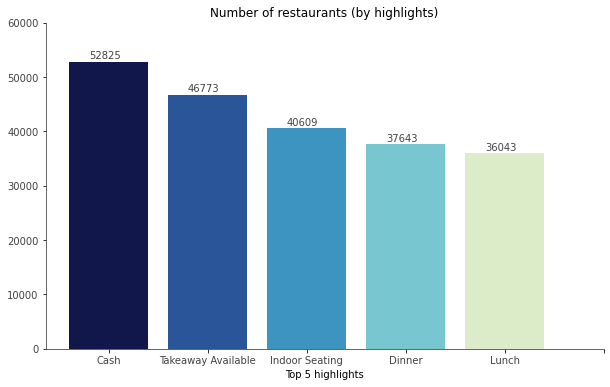

In [56]:
h_count = hl.value_counts()[:5]

fig = plt.figure(figsize=[10,6], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#11174b', '#2a5599', '#3e94c0', '#78c6d0', '#dcecc9']
plt.bar(h_count.index, h_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 70000, 10000), color="#424242")
plt.xlabel("Top 5 highlights")

for i, v in enumerate(h_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by highlights)")


plt.show()

Top 5 highlights doesn't convey much information since they are very trivial to almost every restaurant. Let's look at uncommon highlights that matter more to the customers.
#### Highest rated highlights

In [57]:
data["highlights"][0]

"['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"

In [58]:
data["highlights2"] = data['highlights'].apply(lambda x : x[2:-2].split("', '"))

hl_list = hl.unique().tolist()
zeros = np.zeros(shape=(len(hl_list),2))
h_and_r = pd.DataFrame(zeros, index=hl_list, columns=["Sum","Total"])

In [59]:
for i, x in data.iterrows():
    for j in x["highlights2"]:
        h_and_r.loc[j]["Sum"] += x["aggregate_rating"]  
        h_and_r.loc[j]["Total"] += 1

In [60]:
h_and_r["Mean"] = h_and_r["Sum"] / h_and_r["Total"]
h_and_r

,Sum,Total,Mean
Lunch,113340.8,36043.0,3.144600
Takeaway Available,139848.5,46773.0,2.989941
Credit Card,94107.2,27530.0,3.418351
Dinner,118364.5,37643.0,3.144396
Cash,157862.8,52825.0,2.988411
...,...,...,...
Celebrity Frequented,90.1,22.0,4.095455
Alipay Accepted,3.0,1.0,3.000000
Subscription Available,4.1,1.0,4.100000
Subscription Required,4.5,1.0,4.500000


In [61]:
h_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
Subscription Required,4.500000,1.0
Speakeasy,4.300000,3.0
Gastro Pub,4.198551,69.0
Craft Beer,4.197297,148.0
Romantic Dining,4.162416,149.0
Sneakpeek,4.128316,392.0
Subscription Available,4.100000,1.0
Celebrity Frequented,4.095455,22.0
Keto Options,4.049153,59.0
Pet Friendly,4.017576,165.0


We can safely ignore highlights which have a frequency of less than 10 since they can be considered as outliers. Features like Gastro pub, Craft beer, Romantic dining and Sneakpeek are well received among customers.

#### Highlights wordcloud
Here we will create a wordcloud of top 30 highlights

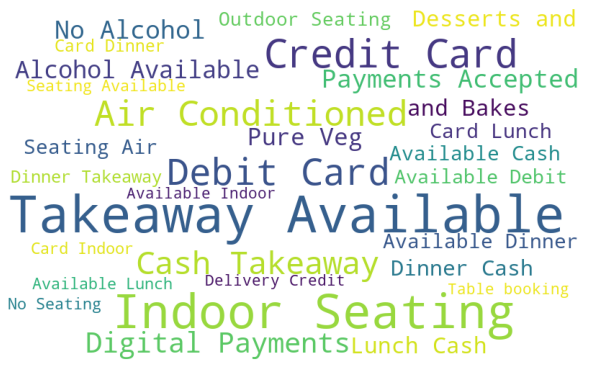

In [62]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/

hl_str = ""
for i in hl:
    hl_str += str(i) + " "
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10, max_words=30).generate(hl_str) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Ratings and cost
#### Ratings distribution
Let's see how the ratings are distributes

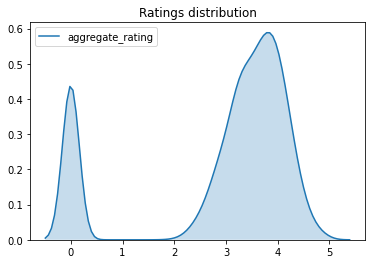

In [63]:
sns.kdeplot(data['aggregate_rating'], shade=True)
plt.title("Ratings distribution")
plt.show()

There is a huge spike at 0 which might account for newly opened or unrated restaurants. On average, majority of restaurants have rating between 3 to 4 with fewer restaurants managing to go beyond 4.
#### Avergae cost for two distribution

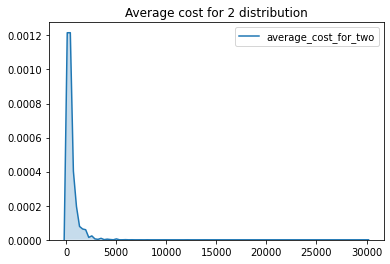

In [64]:
sns.kdeplot(data['average_cost_for_two'], shade=True)
plt.title("Average cost for 2 distribution")
plt.show()

With few restaurants charging average of Rs.25000+ for two, this graph is extremely skewed. Let's take a closer look at a lower range of 0 to 60000.

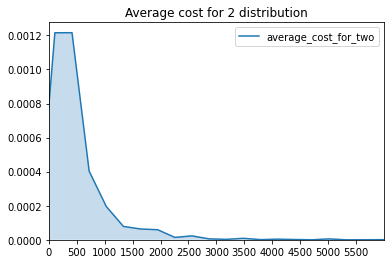

In [65]:
sns.kdeplot(data['average_cost_for_two'], shade=True)
plt.xlim([0, 6000])
plt.xticks(range(0,6000,500))
plt.title("Average cost for 2 distribution")
plt.show()

Majority of restaurants are budget friendly with an average cost between Rs.250 to Rs.800 for two.

#### Price range count

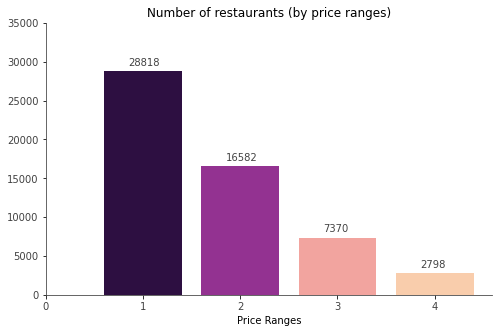

In [66]:
pr_count = data.groupby("price_range").count()["name"]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#f2a49f","#f9cdac"]
plt.bar(pr_count.index, pr_count.values, color=colors)

plt.xticks(range(0, 5), color="#424242")
plt.yticks(range(0, 40000, 5000), color="#424242")
plt.xlabel("Price Ranges")

for i, v in enumerate(pr_count):
    ax.text(i+0.85, v+700, str(v), color='#424242')
plt.title("Number of restaurants (by price ranges)")


plt.show()

Price range chart supports our previous observation from the Average cost chart. Number of restaurant decreases with increase in price range.

#### Relation between Average price for two and Rating

In [67]:
np.round(data[["average_cost_for_two","aggregate_rating"]].corr()["average_cost_for_two"][1],2)

0.25

A correlation can be seen between restaurant average cost and rating

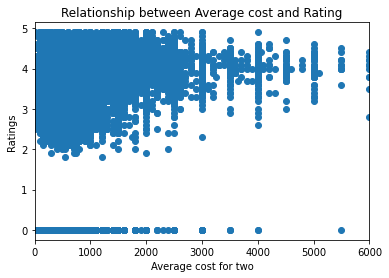

In [68]:
plt.plot("average_cost_for_two","aggregate_rating", data=data, linestyle="none", marker="o")
plt.xlim([0,6000])
plt.title("Relationship between Average cost and Rating")
plt.xlabel("Average cost for two")
plt.ylabel("Ratings")
plt.show()

There is definetely a direct relation between the two. Let's take a smaller sample to draw a clearer scatter plot.

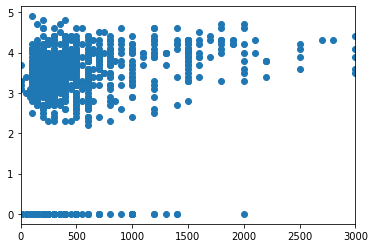

In [69]:
plt.plot("average_cost_for_two","aggregate_rating", data=data.sample(1000), linestyle="none", marker="o")
plt.xlim([0,3000])
plt.show()

This relation concludes that that as average cost for two increases, there is a better chance that the restaurant will be rated highly. Let's look at price range for a better comparison.

#### Relation between Price range and Rating

In [70]:
np.round(data[["price_range","aggregate_rating"]].corr()["price_range"][1],2)

0.25

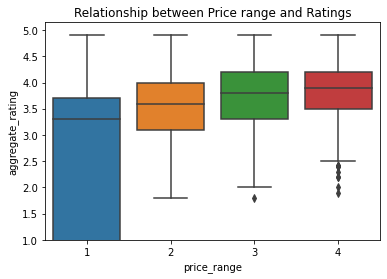

In [71]:
sns.boxplot(x='price_range', y='aggregate_rating', data=data)
plt.ylim(1)
plt.title("Relationship between Price range and Ratings")
plt.show()

Now, it is clear. The higher the price a restaurant charges, more services they provide and hence more chances of getting good ratings from their customers.

## Conclusions

After working on this data, we can conclude the following things:-
1. Approx. 35% of restaurants in India are part of some chain
2. Domino's Pizza, Cafe Coffee Day, KFC are the biggest fast food chains in the country with most number of outlets
3. Barbecues and Grill food chains have highest average ratings than other type of restaurants 
4. Quick bites and casual dining type of establishment have most number of outlets
5. Establishments with alcohol availability have highest average ratings, votes and photo uploads
6. Banglore has most number of restaurants 
7. Gurgaon has highest rated restaurants (average 3.83) whereas Hyderabad has more number of critics (votes). Mumbai and New Delhi dominates for most photo uploads per outlet
8. After North Indian, Chinese is the most prefered cuisine in India
9. International cuisines are better rated than local cuisines
10. Gastro pub, Romantic Dining and Craft Beer features are well rated by customers
11. Most restaurants are rated between 3 and 4
12. Majority of restaurants are budget friendly with average cost of two between Rs.250 to Rs.800
13. There are less number of restaurants at higher price ranges
14. As the average cost of two increases, the chance of a restaurant having higher rating increases

Now we have come to the end of this project, I hope you learned some new tricks. 

<b>Enjoy!</b>